## Dependencies

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

## Web Scraping

In [4]:
books = []
links = []

for i in range(1,51):   # Iteration page 1 to page 50
  url= f"http://books.toscrape.com/catalogue/page-{i}.html"
  response = requests.get(url)  # Use requests.get() to retrieve the HTML content of the target URL
  response = response.content

  # Create a BeautifulSoup object by passing the html_content and the parser type
  soup = BeautifulSoup(response,'html.parser')
  ol = soup.find('ol')  # Find the ol tag to inspect

  # Under the ol tag find all the article tag with class 'product_pod' into articles list
  articles = ol.findAll('article', class_='product_pod')

  for article in articles:  # Get the value of articles list one by one as article variable
    image = article.find('img')
    title = image.attrs['alt'] # Accessing attribute 'alt' to get title of the book
    #print(title)
    star = article.find('p')
    star = star['class'][1] # Get the value of name class in index 1 as star rating
    #print(star)

    detail = article.find('a') # Find a element in article element

    # In 'a' tag we can access attribute 'href' using .attrs to get the URL for each article
    link = 'https://books.toscrape.com/catalogue/' + detail.attrs['href']

    links.append(link)          # Collecting URL of detail book into links list
    books.append([title, star]) # Collecting title and star rating values into books list

In [5]:
# Showing 5 links of details for each book
links[0:5]

['https://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html',
 'https://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html',
 'https://books.toscrape.com/catalogue/soumission_998/index.html',
 'https://books.toscrape.com/catalogue/sharp-objects_997/index.html',
 'https://books.toscrape.com/catalogue/sapiens-a-brief-history-of-humankind_996/index.html']

In [6]:
category = []
genre = []

val_upc = []
val_prod_type = []
val_price_exctax = []
val_price_inctax = []
val_tax = []
val_availability = []
val_num_reviews = []

for detail in links:    # Open the links one by one as detail variable
  res = requests.get(detail)
  res = res.content
  sp = BeautifulSoup(res,'html.parser')

  #Book Category
  ul = sp.find('ul', class_='breadcrumb') # Find ul tag with class 'breadcrumb'
  li = ul.find_all('a') # Under the ul tag find all the 'a' tag into li list

  for i, a in enumerate(li):    # Splitting into index and a value of each li
    if i==2:                    # Index 2 is a category of the book
      category.append(a.text)   # Collecting all values of index 2 into category list
  val_category = category[-1]   # Get the last result of all book categories
  genre.append(val_category)    # Insert the result into genre list

  #Book Details
  table = sp.find('table', {'class' : 'table-striped'}) # Inspect table tag with class 'table-stripped'
  rows = table.find_all('tr')   # Find all tr tag under table tag as rows list

  for index, tr in enumerate(rows): # Splitting into index and tr value of each rows
    if index==0:    # If index is 0 then this tr is called upc
      td = tr.find('td')              # Find td tag under upc tr as td variable
      val_upc.append(td.text.strip()) # Collect all td values for each link into val_upc list
    elif index==1:
      td1 = tr.find('td')
      val_prod_type.append(td1.text.strip())
    elif index==2:
      td2 = tr.find('td')
      val_price_exctax.append(td2.text.strip())
    elif index==3:
      td3 = tr.find('td')
      val_price_inctax.append(td3.text.strip())
    elif index==4:
      td4 = tr.find('td')
      val_tax.append(td4.text.strip())
    elif index==5:
      td5 = tr.find('td')
      val_availability.append(td5.text.strip())
    elif index==6:
      td6 = tr.find('td')
      val_num_reviews.append(td6.text.strip())

    #elif index==6:
    #  num_reviews = []
    #  for td in tr.find_all('td'):
    #    num_reviews.append(td.text.strip())
    #  val_num_reviews.append(num_reviews)

In [7]:
# Showing 5 items of val_upc and genre lists
print(val_upc[0:5])
print(genre[0:5])

# Showing length of val_upc and genre lists
print(len(val_upc))
print(len(genre))

['a897fe39b1053632', '90fa61229261140a', '6957f44c3847a760', 'e00eb4fd7b871a48', '4165285e1663650f']
['Poetry', 'Historical Fiction', 'Fiction', 'Mystery', 'History']
1000
1000


In [8]:
# Function to turn nested list into flat list
'''def flat(ls):
  flatList = []
  # Iterate with outer list
  for element in ls:
      if type(element) is list:
          # Check if type is list than iterate through the sublist
          for item in element:
              flatList.append(item)
      else:
          flatList.append(element)
  return flatList'''

'def flat(ls):\n  flatList = []\n  # Iterate with outer list\n  for element in ls:\n      if type(element) is list:\n          # Check if type is list than iterate through the sublist\n          for item in element:\n              flatList.append(item)\n      else:\n          flatList.append(element)\n  return flatList'

In [9]:
# Using function flat() to change the nested lists
'''ls_val_upc = flat(val_upc)
ls_val_prod_type = flat(val_prod_type)
ls_val_price_exctax = flat(val_price_exctax)
ls_val_price_inctax = flat(val_price_inctax)
ls_val_tax = flat(val_tax)
ls_val_availability = flat(val_availability)
ls_val_num_reviews = flat(val_num_reviews)'''

'ls_val_upc = flat(val_upc)\nls_val_prod_type = flat(val_prod_type)\nls_val_price_exctax = flat(val_price_exctax)\nls_val_price_inctax = flat(val_price_inctax)\nls_val_tax = flat(val_tax)\nls_val_availability = flat(val_availability)\nls_val_num_reviews = flat(val_num_reviews)'

In [10]:
# Creating books dataframe
df1 = pd.DataFrame(books, columns=['Title', 'StarRating'])
df1.head()

,Title,StarRating
0,A Light in the Attic,Three
1,Tipping the Velvet,One
2,Soumission,One
3,Sharp Objects,Four
4,Sapiens: A Brief History of Humankind,Five


In [11]:
# Creating details dataframe
details = {'UPC': val_upc, 'Category': genre, 'ProdType': val_prod_type, 'Price_ExcTax': val_price_exctax,\
        'Price_IncTax': val_price_inctax, 'Tax': val_tax, 'Availability': val_availability, 'NumReviews': val_num_reviews}
df2 = pd.DataFrame(details)
df2.head()

,UPC,Category,ProdType,Price_ExcTax,Price_IncTax,Tax,Availability,NumReviews
0,a897fe39b1053632,Poetry,Books,£51.77,£51.77,£0.00,In stock (22 available),0
1,90fa61229261140a,Historical Fiction,Books,£53.74,£53.74,£0.00,In stock (20 available),0
2,6957f44c3847a760,Fiction,Books,£50.10,£50.10,£0.00,In stock (20 available),0
3,e00eb4fd7b871a48,Mystery,Books,£47.82,£47.82,£0.00,In stock (20 available),0
4,4165285e1663650f,History,Books,£54.23,£54.23,£0.00,In stock (20 available),0


In [12]:
# Concatenate Books and Details dataframe
merged_df = pd.concat([df1, df2], axis=1)
merged_df.head()

,Title,StarRating,UPC,Category,ProdType,Price_ExcTax,Price_IncTax,Tax,Availability,NumReviews
0,A Light in the Attic,Three,a897fe39b1053632,Poetry,Books,£51.77,£51.77,£0.00,In stock (22 available),0
1,Tipping the Velvet,One,90fa61229261140a,Historical Fiction,Books,£53.74,£53.74,£0.00,In stock (20 available),0
2,Soumission,One,6957f44c3847a760,Fiction,Books,£50.10,£50.10,£0.00,In stock (20 available),0
3,Sharp Objects,Four,e00eb4fd7b871a48,Mystery,Books,£47.82,£47.82,£0.00,In stock (20 available),0
4,Sapiens: A Brief History of Humankind,Five,4165285e1663650f,History,Books,£54.23,£54.23,£0.00,In stock (20 available),0


In [13]:
merged_df.shape

(1000, 10)

## Data Cleaning

### Setting UPC Column as an Index

In [16]:
# Column to move
column_to_move = 'UPC'

# Pop the column (removes it and returns its Series)
col_series = merged_df.pop(column_to_move)

# Insert the column at index 0
merged_df.insert(0, column_to_move, col_series)
merged_df.head()

,UPC,Title,StarRating,Category,ProdType,Price_ExcTax,Price_IncTax,Tax,Availability,NumReviews
0,a897fe39b1053632,A Light in the Attic,Three,Poetry,Books,£51.77,£51.77,£0.00,In stock (22 available),0
1,90fa61229261140a,Tipping the Velvet,One,Historical Fiction,Books,£53.74,£53.74,£0.00,In stock (20 available),0
2,6957f44c3847a760,Soumission,One,Fiction,Books,£50.10,£50.10,£0.00,In stock (20 available),0
3,e00eb4fd7b871a48,Sharp Objects,Four,Mystery,Books,£47.82,£47.82,£0.00,In stock (20 available),0
4,4165285e1663650f,Sapiens: A Brief History of Humankind,Five,History,Books,£54.23,£54.23,£0.00,In stock (20 available),0


### Removing Currency Symbol in Price and Tax Columns

In [18]:
# Extracts characters from index 1
merged_df['Price_ExcTax'] = merged_df['Price_ExcTax'].str[1:]
merged_df['Price_IncTax'] = merged_df['Price_IncTax'].str[1:]
merged_df['Tax'] = merged_df['Tax'].str[1:]
merged_df.head()

,UPC,Title,StarRating,Category,ProdType,Price_ExcTax,Price_IncTax,Tax,Availability,NumReviews
0,a897fe39b1053632,A Light in the Attic,Three,Poetry,Books,51.77,51.77,0.00,In stock (22 available),0
1,90fa61229261140a,Tipping the Velvet,One,Historical Fiction,Books,53.74,53.74,0.00,In stock (20 available),0
2,6957f44c3847a760,Soumission,One,Fiction,Books,50.10,50.10,0.00,In stock (20 available),0
3,e00eb4fd7b871a48,Sharp Objects,Four,Mystery,Books,47.82,47.82,0.00,In stock (20 available),0
4,4165285e1663650f,Sapiens: A Brief History of Humankind,Five,History,Books,54.23,54.23,0.00,In stock (20 available),0


### Extract a Substring from Availability column

In [20]:
# Extracts characters from index 0 up to (but not including) 8 into Available Column
merged_df['Available'] = merged_df['Availability'].str.slice(0, 8)

# Extracts characters from index 10 up to (but not including) 12 into Stock Column
merged_df['Stock'] = merged_df['Availability'].str.slice(10, 12)

# Drop Availability column
merged_df.drop('Availability', axis=1, inplace=True)
merged_df.head()

,UPC,Title,StarRating,Category,ProdType,Price_ExcTax,Price_IncTax,Tax,NumReviews,Available,Stock
0,a897fe39b1053632,A Light in the Attic,Three,Poetry,Books,51.77,51.77,0.00,0,In stock,22
1,90fa61229261140a,Tipping the Velvet,One,Historical Fiction,Books,53.74,53.74,0.00,0,In stock,20
2,6957f44c3847a760,Soumission,One,Fiction,Books,50.10,50.10,0.00,0,In stock,20
3,e00eb4fd7b871a48,Sharp Objects,Four,Mystery,Books,47.82,47.82,0.00,0,In stock,20
4,4165285e1663650f,Sapiens: A Brief History of Humankind,Five,History,Books,54.23,54.23,0.00,0,In stock,20


### Removing Special Characters and Punctuation

In [22]:
import re

def remove_special_chars(text):
    # Remove anything that is not a letter, number, or whitespace
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    return text

In [23]:
merged_df['Title'] = merged_df['Title'].apply(remove_special_chars)

In [24]:
merged_df['Title'].head()

0                    A Light in the Attic
1                      Tipping the Velvet
2                              Soumission
3                           Sharp Objects
4    Sapiens A Brief History of Humankind
Name: Title, dtype: object

### Identify Duplicates Based on a Subset of Columns

In [26]:
# The total number of rows in a df
merged_df.shape[0]

1000

In [27]:
duplicate_title = merged_df.duplicated(subset=['Title'], keep=False)
duplicate_title_rows = merged_df[duplicate_title]
print("\nDuplicate rows based on 'Title':")
duplicate_title_rows


Duplicate rows based on 'Title':


,UPC,Title,StarRating,Category,ProdType,Price_ExcTax,Price_IncTax,Tax,NumReviews,Available,Stock
236,1528279aec1f3dce,The StarTouched Queen,Five,Fantasy,Books,46.02,46.02,0.00,0,In stock,14
358,4a7a25be293ad678,The StarTouched Queen,Five,Fantasy,Books,32.30,32.30,0.00,0,In stock,12


In [28]:
# Drop duplicate rows based on 'Title' and keep the last occurrence
df_cleaned = merged_df.drop_duplicates(subset=['Title'], keep='last')

In [29]:
# The total number of rows in a df after dropping duplicates
df_cleaned.shape[0]

999

### Checking Blank or Null Values

In [31]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   UPC           999 non-null    object
 1   Title         999 non-null    object
 2   StarRating    999 non-null    object
 3   Category      999 non-null    object
 4   ProdType      999 non-null    object
 5   Price_ExcTax  999 non-null    object
 6   Price_IncTax  999 non-null    object
 7   Tax           999 non-null    object
 8   NumReviews    999 non-null    object
 9   Available     999 non-null    object
 10  Stock         999 non-null    object
dtypes: object(11)
memory usage: 93.7+ KB


In [32]:
# Change data type of columns
df_cleaned['Price_ExcTax'] = df_cleaned['Price_ExcTax'].astype(float)
df_cleaned['Price_IncTax'] = df_cleaned['Price_IncTax'].astype(float)
df_cleaned['Tax'] = df_cleaned['Tax'].astype(float)
df_cleaned['NumReviews'] = df_cleaned['NumReviews'].astype(int)
df_cleaned['Stock'] = df_cleaned['Stock'].astype(int)

In [33]:
blank = df_cleaned[(df_cleaned['UPC'] == '') | (df_cleaned['Title'] == '')\
                   | (df_cleaned['StarRating'] == '') | (df_cleaned['Category'] == '')\
                   | (df_cleaned['ProdType'] == '') | (df_cleaned['Price_ExcTax'] == 0.0)\
                    | (df_cleaned['Price_IncTax'] == 0.0) | (df_cleaned['Available'] == '')]
blank.shape[0]

0

In [34]:
df_cleaned.isnull().sum()

UPC             0
Title           0
StarRating      0
Category        0
ProdType        0
Price_ExcTax    0
Price_IncTax    0
Tax             0
NumReviews      0
Available       0
Stock           0
dtype: int64

### Custom or equal-width bins of Price and Stock

In [36]:
bins = [0, 25, 50, 75]
labels = ['Low', 'Medium', 'High']
df_cleaned['PriceCategory'] = pd.cut(df_cleaned['Price_IncTax'], bins=bins, labels=labels, right=True)
df_cleaned.sample(5)

,UPC,Title,StarRating,Category,ProdType,Price_ExcTax,Price_IncTax,Tax,NumReviews,Available,Stock,PriceCategory
68,bd261725b99f5983,The Death of Humanity and the Case for Life,Four,Philosophy,Books,58.11,58.11,0.0,0,In stock,16,High
611,6036239d2ab349b7,Peak Secrets from the New Science of Expertise,Two,Science,Books,16.28,16.28,0.0,0,In stock,5,Low
75,6f78a0d744c35456,Security,Two,Horror,Books,39.25,39.25,0.0,0,In stock,16,Medium
406,20dc4f1ac5d4fd9c,Keep Me Posted,Four,Womens Fiction,Books,20.46,20.46,0.0,0,In stock,11,Low
338,1fbb5f786e53a0ce,Angels Walking Angels Walking 1,Two,Add a comment,Books,34.20,34.20,0.0,0,In stock,14,Medium


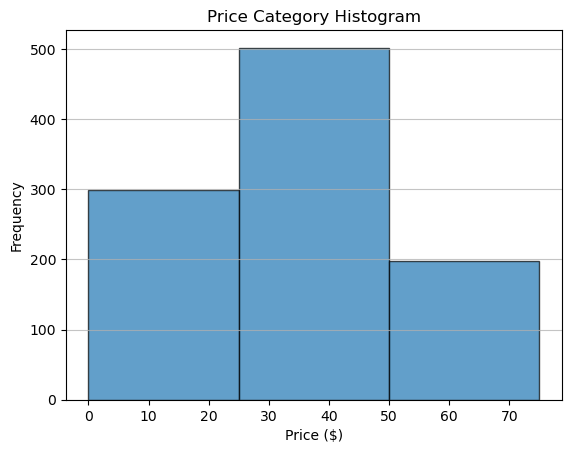

In [37]:
plt.hist(df_cleaned['Price_IncTax'], bins=bins, edgecolor='black', alpha=0.7)
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.title("Price Category Histogram")
plt.grid(axis='y', alpha=0.75)
plt.show()

In [38]:
bins = [0, 10, 20, 30]
labels = ['0-10', '11-20', '21-30']
df_cleaned['Stock_Rg'] = pd.cut(df_cleaned['Stock'], bins=bins, labels=labels, right=True)
df_cleaned.sample(5)

,UPC,Title,StarRating,Category,ProdType,Price_ExcTax,Price_IncTax,Tax,NumReviews,Available,Stock,PriceCategory,Stock_Rg
123,f733e8c19d40ec2e,A Murder in Time,One,Mystery,Books,16.64,16.64,0.0,0,In stock,16,Low,11-20
907,e7e87087b1a44711,Vampire Knight Vol 1 Vampire Knight 1,One,Paranormal,Books,15.40,15.40,0.0,0,In stock,1,Low,0-10
626,630e766f0a1987dd,Fool Me Once,One,Default,Books,16.96,16.96,0.0,0,In stock,5,Low,0-10
257,0c7b9cf2b7662b65,That Darkness Gardiner and Renner 1,One,Mystery,Books,13.92,13.92,0.0,0,In stock,14,Low,11-20
176,31001a1210623bd4,Poems That Make Grown Women Cry,Four,Poetry,Books,14.19,14.19,0.0,0,In stock,15,Low,11-20


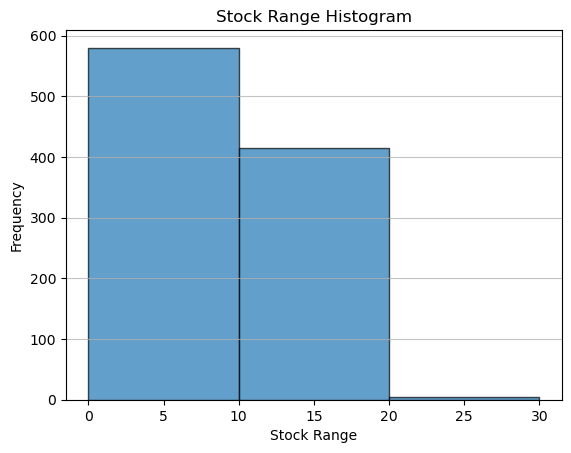

In [39]:
plt.hist(df_cleaned['Stock'], bins=bins, edgecolor='black', alpha=0.7)
plt.xlabel("Stock Range")
plt.ylabel("Frequency")
plt.title("Stock Range Histogram")
plt.grid(axis='y', alpha=0.75)
plt.show()

### Label Encoding of Star Rating Values

In [41]:
star_map = {'One': '1', 'Two': '2', 'Three': '3', 'Four': '4', 'Five': '5'}
df_cleaned['StarRating'].replace(star_map, inplace=True)
df_cleaned['StarRating'].value_counts().sort_index()

StarRating
1    226
2    196
3    203
4    179
5    195
Name: count, dtype: int64

### Checking Pattern Values of Columns

In [43]:
# All books are not sold out yet
soldout = df_cleaned[~df_cleaned['Available'].str.contains('in stock', case=False)]
soldout.shape[0]

0

In [44]:
# The values ​​of price_exctax and price_inctax are same
diff_price = df_cleaned[df_cleaned['Price_ExcTax'] != df_cleaned['Price_IncTax']]
diff_price.shape[0]

0

In [45]:
# All filled only 1 value
df_cleaned['Tax'].value_counts()

Tax
0.0    999
Name: count, dtype: int64

In [46]:
# All filled only 1 value
df_cleaned['NumReviews'].value_counts()

NumReviews
0    999
Name: count, dtype: int64

In [47]:
# Removing unnecessary columns
df_cleaned.drop(columns=['Price_ExcTax','Tax','NumReviews'], axis=1, inplace=True)
#df_cleaned.to_string(justify='left')
df_cleaned.head()

,UPC,Title,StarRating,Category,ProdType,Price_IncTax,Available,Stock,PriceCategory,Stock_Rg
0,a897fe39b1053632,A Light in the Attic,3,Poetry,Books,51.77,In stock,22,High,21-30
1,90fa61229261140a,Tipping the Velvet,1,Historical Fiction,Books,53.74,In stock,20,High,11-20
2,6957f44c3847a760,Soumission,1,Fiction,Books,50.10,In stock,20,High,11-20
3,e00eb4fd7b871a48,Sharp Objects,4,Mystery,Books,47.82,In stock,20,Medium,11-20
4,4165285e1663650f,Sapiens A Brief History of Humankind,5,History,Books,54.23,In stock,20,High,11-20


## Data Storage

### Saving to a CSV File

In [50]:
df_cleaned.to_csv('books.csv', index=True)

### Export to a PostgreSQL DB

In [52]:
!pip install pandas sqlalchemy psycopg2-binary

In [53]:
from sqlalchemy import create_engine
import pandas as pd

# Replace with your PostgreSQL connection details
db_user = "postgres"
db_password = "ndahadmin"
db_host = "localhost"  # or your host IP/name
db_port = "5432"
db_name = "webscraping"

# Create the connection string
engine_str = f"postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"
engine = create_engine(engine_str)
#conn = engine.connect()

In [54]:
table_name = "books2"  # Name of the table in PostgreSQL

df_cleaned.to_sql(
  table_name,
  engine,
  if_exists = 'replace',  # Options: 'fail', 'replace', 'append'
  index = False           # Set to True if you want to export the DataFrame index as a column
)

print(f"DataFrame successfully exported to '{table_name}' in PostgreSQL.")

DataFrame successfully exported to 'books2' in PostgreSQL.


### Querying from Postgres DB

In [56]:
import psycopg2
conn = psycopg2.connect(host="localhost",dbname="webscraping",user="postgres",password="ndahadmin",port=5432)

In [57]:
cur = conn.cursor()

In [58]:
query = """select * from books2 LIMIT 10"""

cur.execute(query)

data = cur.fetchall()

select_data = pd.DataFrame(data, columns=['UPC','Title','StarRating','Category','ProdType','Price_IncTax','Available','Stock','PriceCategory','Stock_Rg'])
select_data

,UPC,Title,StarRating,Category,ProdType,Price_IncTax,Available,Stock,PriceCategory,Stock_Rg
0,a897fe39b1053632,A Light in the Attic,3,Poetry,Books,51.77,In stock,22,High,21-30
1,90fa61229261140a,Tipping the Velvet,1,Historical Fiction,Books,53.74,In stock,20,High,11-20
2,6957f44c3847a760,Soumission,1,Fiction,Books,50.10,In stock,20,High,11-20
3,e00eb4fd7b871a48,Sharp Objects,4,Mystery,Books,47.82,In stock,20,Medium,11-20
4,4165285e1663650f,Sapiens A Brief History of Humankind,5,History,Books,54.23,In stock,20,High,11-20
5,f77dbf2323deb740,The Requiem Red,1,Young Adult,Books,22.65,In stock,19,Low,11-20
6,2597b5a345f45e1b,The Dirty Little Secrets of Getting Your Dream...,4,Business,Books,33.34,In stock,19,Medium,11-20
7,e72a5dfc7e9267b2,The Coming Woman A Novel Based on the Life of ...,3,Default,Books,17.93,In stock,19,Low,11-20
8,e10e1e165dc8be4a,The Boys in the Boat Nine Americans and Their ...,4,Default,Books,22.60,In stock,19,Low,11-20
9,1dfe412b8ac00530,The Black Maria,1,Poetry,Books,52.15,In stock,19,High,11-20


## EDA (Exploratory Data Analysis)

In [60]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   UPC            999 non-null    object  
 1   Title          999 non-null    object  
 2   StarRating     999 non-null    object  
 3   Category       999 non-null    object  
 4   ProdType       999 non-null    object  
 5   Price_IncTax   999 non-null    float64 
 6   Available      999 non-null    object  
 7   Stock          999 non-null    int32   
 8   PriceCategory  999 non-null    category
 9   Stock_Rg       999 non-null    category
dtypes: category(2), float64(1), int32(1), object(6)
memory usage: 68.5+ KB


### View The Top 5 of Book Categories

In [62]:
cnt_category = df_cleaned['Category'].value_counts().sort_values(ascending=False).head()
cnt_category = cnt_category.reset_index()
cnt_category

,Category,count
0,Default,152
1,Nonfiction,110
2,Sequential Art,75
3,Add a comment,67
4,Fiction,65


In [63]:
top_category = df_cleaned[df_cleaned['Category'].isin(cnt_category['Category'])]
top_category.head()
#top_category['Category'].value_counts()

,UPC,Title,StarRating,Category,ProdType,Price_IncTax,Available,Stock,PriceCategory,Stock_Rg
2,6957f44c3847a760,Soumission,1,Fiction,Books,50.10,In stock,20,High,11-20
7,e72a5dfc7e9267b2,The Coming Woman A Novel Based on the Life of ...,3,Default,Books,17.93,In stock,19,Low,11-20
8,e10e1e165dc8be4a,The Boys in the Boat Nine Americans and Their ...,4,Default,Books,22.60,In stock,19,Low,11-20
10,0312262ecafa5a40,Starving Hearts Triangular Trade Trilogy 1,2,Default,Books,13.99,In stock,19,Low,11-20
13,3b1c02bac2a429e6,Scott Pilgrims Precious Little Life Scott Pilg...,5,Sequential Art,Books,52.29,In stock,19,High,11-20


In [64]:
category_rtg = top_category.groupby(['Category', 'StarRating']).agg(CountStars=('StarRating', 'count'))
category_rtg = category_rtg.reset_index()

pivot_category_rtg = category_rtg.pivot(index='Category', columns=['StarRating'], values='CountStars')
pivot_category_rtg.sort_values(by='5', ascending=False)

StarRating,1,2,3,4,5
Category,,,,,
Default,33,40,27,23,29
Nonfiction,24,23,25,18,20
Fiction,13,6,19,10,17
Sequential Art,13,17,16,17,12
Add a comment,16,13,17,13,8


Analysis : The book category with the largest number is Default, but the majority have a 2 star rating. There are only 29 of 5 star rating.

### View The Recommended Book for Purchased

In [67]:
fivestars_df = df_cleaned[df_cleaned['StarRating'] == '5']
fivestars_df.head()

,UPC,Title,StarRating,Category,ProdType,Price_IncTax,Available,Stock,PriceCategory,Stock_Rg
4,4165285e1663650f,Sapiens A Brief History of Humankind,5,History,Books,54.23,In stock,20,High,11-20
12,ce6396b0f23f6ecc,Set Me Free,5,Young Adult,Books,17.46,In stock,19,Low,11-20
13,3b1c02bac2a429e6,Scott Pilgrims Precious Little Life Scott Pilg...,5,Sequential Art,Books,52.29,In stock,19,High,11-20
14,a34ba96d4081e6a4,Rip it Up and Start Again,5,Music,Books,35.02,In stock,19,Medium,11-20
23,c2e46a2ee3b4a322,Chase Me Paris Nights 2,5,Romance,Books,25.27,In stock,19,Medium,11-20


In [68]:
fivestars_cat = fivestars_df['Category'].value_counts().sort_values(ascending=False).head()
fivestars_cat = fivestars_cat.reset_index()
fivestars_cat

,Category,count
0,Default,29
1,Nonfiction,20
2,Fiction,17
3,Young Adult,15
4,Sequential Art,12


In [69]:
fivestars_df = fivestars_df[fivestars_df['Category'].isin(fivestars_cat['Category'])]
fivestars_df.head()

,UPC,Title,StarRating,Category,ProdType,Price_IncTax,Available,Stock,PriceCategory,Stock_Rg
12,ce6396b0f23f6ecc,Set Me Free,5,Young Adult,Books,17.46,In stock,19,Low,11-20
13,3b1c02bac2a429e6,Scott Pilgrims Precious Little Life Scott Pilg...,5,Sequential Art,Books,52.29,In stock,19,High,11-20
28,4c28def39d850cdf,Worlds Elsewhere Journeys Around Shakespeares ...,5,Nonfiction,Books,40.30,In stock,18,Medium,11-20
42,b12b89017878a60d,Private Paris Private 10,5,Fiction,Books,47.61,In stock,17,Medium,11-20
43,c27f6e1f185b0383,HigherSelfie Wake Up Your Life Free Your Soul ...,5,Nonfiction,Books,23.11,In stock,17,Low,11-20


In [70]:
fivestars_price = fivestars_df.groupby(['Category', 'PriceCategory']).agg(LvlPrice=('PriceCategory', 'count'))
fivestars_price = fivestars_price.reset_index()

pivot_fivestars_price = fivestars_price.pivot(index='Category', columns=['PriceCategory'], values='LvlPrice')
pivot_fivestars_price.sort_values(by='Low', ascending=False)

PriceCategory,Low,Medium,High
Category,,,
Default,11,13,5
Sequential Art,6,3,3
Nonfiction,5,9,6
Young Adult,5,8,2
Fiction,3,8,6


Analysis : The most popular 5-star rating book category is Default. These books are highly recommended for purchase due to their affordable prices at the Low level (<25 dollars) and Medium level (25-50 dollars).

In [72]:
recommended_books = df_cleaned[(df_cleaned['Category'] == 'Default') & (df_cleaned['StarRating'] == '5') \
                               & (df_cleaned['PriceCategory'].isin(['Low','Medium']))]
# Set the option to display all columns
pd.set_option('display.max_colwidth', None)
recommended_books

,UPC,Title,StarRating,Category,ProdType,Price_IncTax,Available,Stock,PriceCategory,Stock_Rg
65,8c9e6bf2467d740d,The Inefficiency Assassin Time Management Tactics for Working Smarter Not Longer,5,Default,Books,20.59,In stock,16,Low,11-20
162,e7469e22b5bfb3e7,The Art of War,5,Default,Books,33.34,In stock,15,Medium,11-20
197,f6d967cdadc6fbd9,Done Rubbed Out Reightman Bailey 1,5,Default,Books,37.72,In stock,15,Medium,11-20
237,00c4543ec6bd25b4,The Songs of the Gods,5,Default,Books,44.48,In stock,14,Medium,11-20
263,95019eac1c0a052f,Steve Jobs,5,Default,Books,39.50,In stock,14,Medium,11-20
293,708345c9897fd7c5,Lady Midnight The Dark Artifices 1,5,Default,Books,16.28,In stock,14,Low,11-20
302,f201f263d8c23f97,Greek Mythic History,5,Default,Books,10.23,In stock,14,Low,11-20
414,bb967277222e689c,Adultery,5,Default,Books,20.88,In stock,11,Low,11-20
425,4b50fb1359ebf35d,The New Brand You Your New Image Makes the Sale for You,5,Default,Books,44.05,In stock,9,Medium,0-10
449,e0bdd79c7304ee8d,The Unlikely Pilgrimage of Harold Fry Harold Fry 1,5,Default,Books,43.62,In stock,8,Medium,0-10


### View Top 10 Book Categories that Have Large Stocks

In [74]:
df_cleaned[df_cleaned['Stock']==0]

,UPC,Title,StarRating,Category,ProdType,Price_IncTax,Available,Stock,PriceCategory,Stock_Rg


In [75]:
# Top 10 book categories by total stock
ten_categories_stock = df_cleaned.groupby(['Category']).agg(TotalStock=('Stock', 'sum'))
ten_categories_stock = ten_categories_stock.reset_index()
ten_categories_stock = ten_categories_stock.sort_values('TotalStock', ascending=False).head(10)
ten_categories_stock

,Category,TotalStock
14,Default,1345
28,Nonfiction,975
41,Sequential Art,686
17,Fiction,588
1,Add a comment,516
49,Young Adult,464
16,Fantasy,358
18,Food and Drink,319
26,Mystery,290
37,Romance,269


In [76]:
# Dataframe of those book categories
category_stock_df = df_cleaned[df_cleaned['Category'].isin(ten_categories_stock['Category'])]
category_stock_df.head()

,UPC,Title,StarRating,Category,ProdType,Price_IncTax,Available,Stock,PriceCategory,Stock_Rg
2,6957f44c3847a760,Soumission,1,Fiction,Books,50.10,In stock,20,High,11-20
3,e00eb4fd7b871a48,Sharp Objects,4,Mystery,Books,47.82,In stock,20,Medium,11-20
5,f77dbf2323deb740,The Requiem Red,1,Young Adult,Books,22.65,In stock,19,Low,11-20
7,e72a5dfc7e9267b2,The Coming Woman A Novel Based on the Life of the Infamous Feminist Victoria Woodhull,3,Default,Books,17.93,In stock,19,Low,11-20
8,e10e1e165dc8be4a,The Boys in the Boat Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics,4,Default,Books,22.60,In stock,19,Low,11-20


In [77]:
# Making pivot table of Category, StarRating, PriceCategory and Total Stock as a value
filtered_category_stock = category_stock_df.groupby(['Category', 'StarRating', 'PriceCategory']).agg(TotalStock=('Stock', 'sum'))
filtered_category_stock = filtered_category_stock.reset_index()
#filtered_category_stock

pivot_category_stock = filtered_category_stock.pivot(index=['StarRating','PriceCategory'], columns=['Category'], values='TotalStock')
pivot_category_stock.sort_values(by='StarRating', ascending=True)

Category                  Add a comment  Default  Fantasy  Fiction  \
StarRating PriceCategory                                             
1          Low                       38       59        4       12   
           Medium                    40      164       59       68   
           High                      21       37       19       39   
2          Low                        3      165        3       29   
           Medium                    81      144       19        5   
           High                      33       32       39       20   
3          Low                       35       92       17       52   
           Medium                    60      131       56       94   
           High                      12       43        9       22   
4          Low                       68       61        9       36   
           Medium                    19      122       28       38   
           High                      34       55       23       28   
5          Low                        7       80       23       31   
           Medium                    62       99       45       59   
           High                       3       61        5       55   

Category                  Food and Drink  Mystery  Nonfiction  Romance  \
StarRating PriceCategory                                                 
1          Low                        17       77          47       38   
           Medium                     57        0          89       40   
           High                       16        1          28        4   
2          Low                        16       17          79        0   
           Medium                     38       17         138        5   
           High                        8       14          16       15   
3          Low                        11       13          92       14   
           Medium                     60       30          98       42   
           High                        0       12          30       16   
4          Low                        25       13          45       31   
           Medium                      7       35         102       14   
           High                        0       29          22        0   
5          Low                        29        4          49       11   
           Medium                     15       21         103       39   
           High                       20        7          37        0   

Category                  Sequential Art  Young Adult  
StarRating PriceCategory                               
1          Low                        44           24  
           Medium                     41           54  
           High                       21           25  
2          Low                        46           30  
           Medium                    130           43  
           High                       30            6  
3          Low                        22            3  
           Medium                     59           38  
           High                       33           14  
4          Low                        56           14  
           Medium                     85           36  
           High                       22           44  
5          Low                        58           46  
           Medium                      3           76  
           High                       36           11

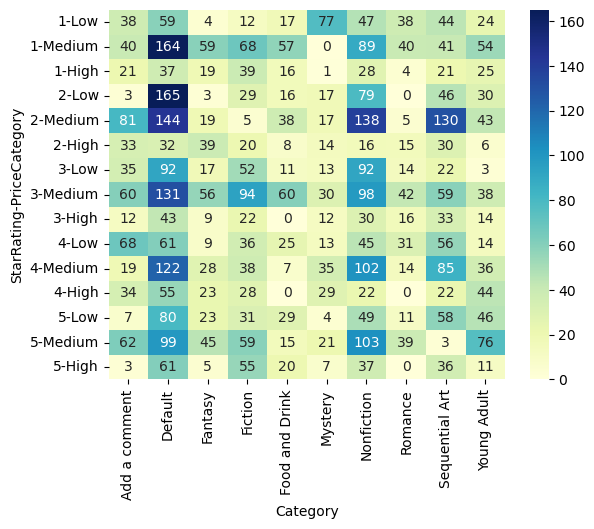

In [78]:
sns.heatmap(pivot_category_stock, cmap="YlGnBu", annot=True, fmt="0.0f")
plt.show()

Analysis : All books in the Default and Nonfiction categories are less popular with buyers, as can be seen from the large available stock, including the Sequential Art category with a 2-star rating. Even though the prices of books are Low and Medium, the available stock is still very large.

## Data Visualizations

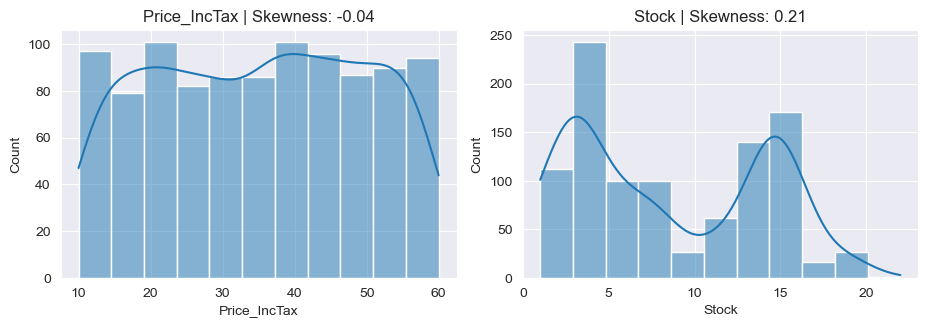

In [81]:
# Distribution of Numerical Columns
sns.set_style("darkgrid")

numerical_columns = df_cleaned.select_dtypes(include=["int32","float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 3, idx)
    sns.histplot(df_cleaned[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df_cleaned[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

Analysis : 
* Negative skewness, also known as left-skewed, means the distribution's tail is longer on the left side, indicating that the majority of the data points are concentrated on the right side of the mean. In such a distribution, the mean is typically less than the median (Mean<Median) because the few low-value outliers on the left pull the mean down.
* Positive skewness means the data has a long right tail and most data points are concentrated on the left side. This indicates that there are more frequent, lower values in the dataset, with a few extreme high values that pull the mean to the right of the median. As a result, the mean is greater than the median (mean>median), and often greater than the mode (mean>median>mode)

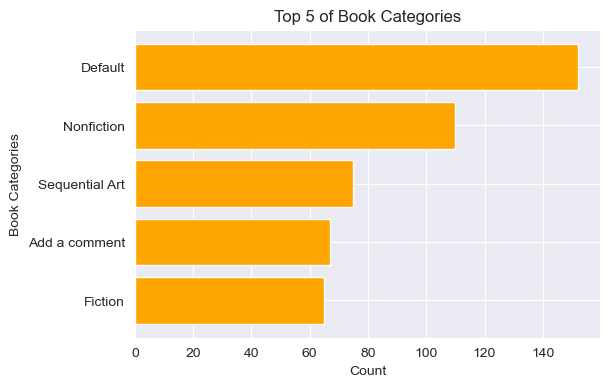

In [83]:
# Bar plot of Top 5 Book Categories
top_cat = top_category['Category'].value_counts(ascending=True)

plt.figure(figsize=(6, 4))
plt.barh(top_cat.index, top_cat, color='orange')
plt.title('Top 5 of Book Categories')
plt.xlabel('Count')
plt.ylabel('Book Categories')
plt.show()

Analysis : The top 5 of book categories include Default, Nonfiction, Sequential Art, Add a comment, and Fiction. The largest number of book categories is Default.

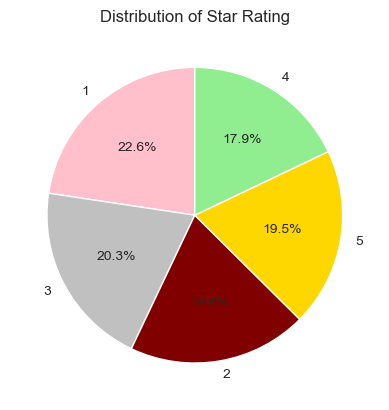

In [85]:
# Pie chart of Star Rating
a = ['pink', 'silver', 'maroon', 'gold', 'lightgreen'] # colors

star_rtg = df_cleaned['StarRating'].value_counts()
star_rtg.plot.pie(autopct='%1.1f%%', startangle=90, colors=a)
plt.title('Distribution of Star Rating')
plt.ylabel('')
plt.show()

Analysis : Most of the books here have a 1 star rating.

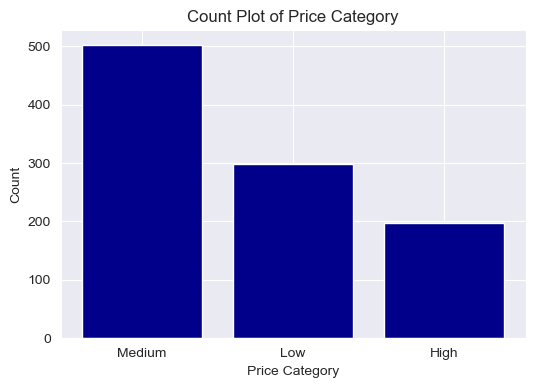

In [87]:
# Bar plot of Price Category
price_cat = df_cleaned['PriceCategory'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(price_cat.index, price_cat, color='darkblue')
plt.title('Count Plot of Price Category')
plt.xlabel('Price Category')
plt.ylabel('Count')
plt.show()

Analysis : Most of the books here have medium price, between 25-50 dollars.

### Top 5 of Book Categories and Price Category

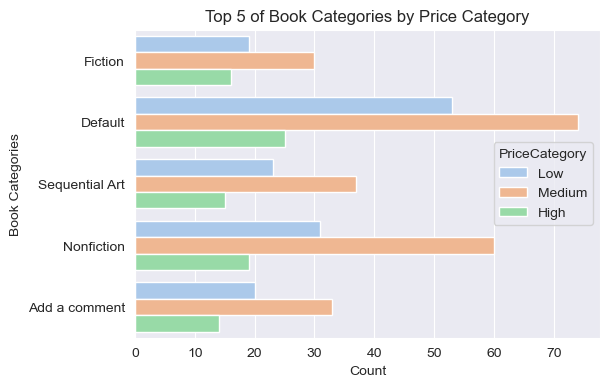

In [90]:
plt.figure(figsize=(6, 4))
sns.countplot(y='Category', hue='PriceCategory', data=top_category, palette='pastel', orient='h')
plt.title('Top 5 of Book Categories by Price Category')
plt.xlabel('Count')
plt.ylabel('Book Categories')
plt.show()

### Top 5 of Book Categories and Star Ratings

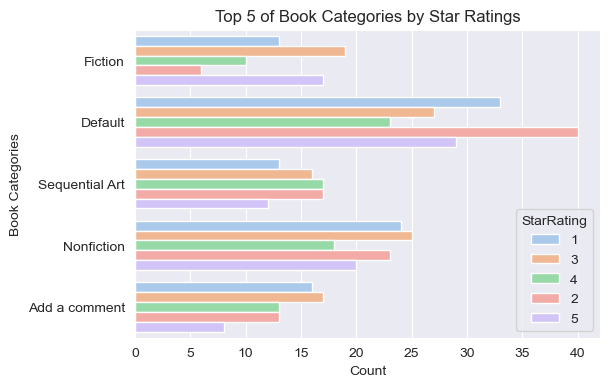

In [92]:
#sorted_star = top_category['StarRating'].sort_values(ascending=True)

plt.figure(figsize=(6, 4))
sns.countplot(y='Category', hue='StarRating', data=top_category, palette='pastel', orient='h')
plt.title('Top 5 of Book Categories by Star Ratings')
plt.xlabel('Count')
plt.ylabel('Book Categories')
plt.show()

### Star Ratings and Price

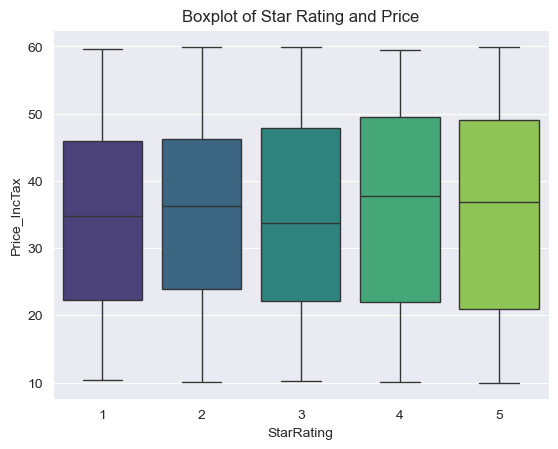

In [94]:
# Quick visual comparisons of their distributions, central tendencies (medians), and variability (spread) of Star Rating and Price_IncTax
#sorted_rtg = df_cleaned['StarRating'].sort_values(ascending=True)
sorted_rtg = df_cleaned['StarRating'].value_counts().sort_index(ascending=True)

sns.boxplot(x='StarRating', y='Price_IncTax', data=df_cleaned, palette='viridis', order=sorted_rtg.index)
plt.title('Boxplot of Star Rating and Price')
plt.show()

Analysis : 5 star books is worth to buy, its have a wider price range and the mid price is around 37 dollars.

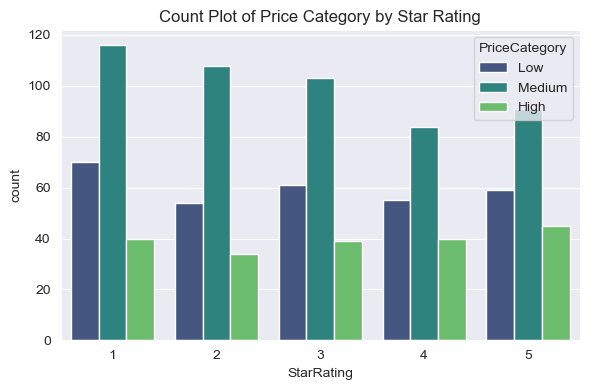

In [96]:
# Count Plot of StarRating by PriceCategory
plt.figure(figsize=(6, 4))
sns.countplot(x='StarRating', hue='PriceCategory', data=df_cleaned, palette='viridis', order=sorted_rtg.index)
plt.title('Count Plot of Price Category by Star Rating')
plt.tight_layout()
plt.show()

Analysis : In general, the higher star rating, the more expensive books there are, the lower the star rating, the more cheap books there are. The number of 5 star ratings books priced at low and medium levels is greater than the number of books with 4 star ratings.

### Price Category and Stock

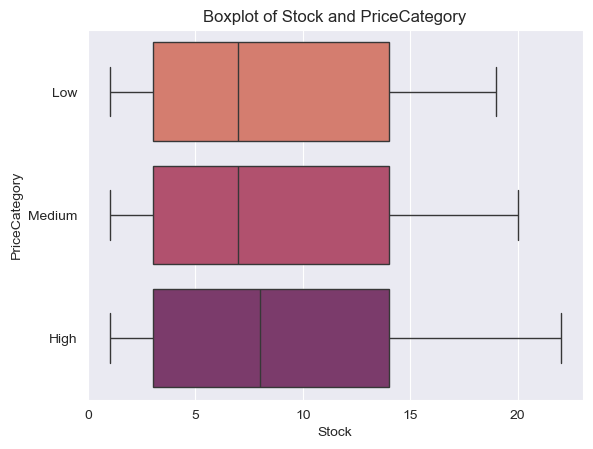

In [99]:
# Quick visual comparisons of their distributions, central tendencies (medians), and variability (spread) of Stock and PriceCategory
sns.boxplot(x='Stock', y='PriceCategory', data=df_cleaned, palette='flare')
plt.title('Boxplot of Stock and PriceCategory')
plt.show()

Analysis : The higher the price of a book, the large stock of books are available, so the median value is also large.

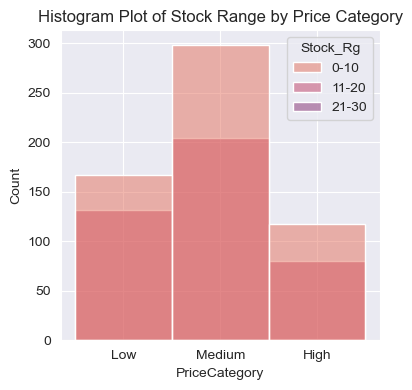

In [101]:
# Histogram Plot of Stock and PriceCategory
plt.figure(figsize=(4, 4))
sns.histplot(x='PriceCategory', hue='Stock_Rg', data=df_cleaned, palette='flare')
plt.title('Histogram Plot of Stock Range by Price Category')
plt.tight_layout()
plt.show()

Analysis :
*   The largest percentage of stock in range 11-20 occurs the books at low price. And the second highest percentage occurs the books at high price.
*   Books with low-level prices make people hesitate to buy them because they assume the book is not good enough to read.
*   Books with high-level prices make people hesitate to buy them because many people consider the book star ratings too, so there are still a lot of stocks of them.